In [39]:
#importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [40]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/content/drive/MyDrive/bank-additional-full.csv", sep = ";")
data.name = "data"
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    41176
True        12
dtype: int64


In [42]:
data = data.drop_duplicates()

In [43]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data['job']      = labelencoder_X.fit_transform(data['job']) 
data['marital']  = labelencoder_X.fit_transform(data['marital']) 
data['education']= labelencoder_X.fit_transform(data['education']) 
data['default']  = labelencoder_X.fit_transform(data['default']) 
data['housing']  = labelencoder_X.fit_transform(data['housing']) 
data['loan']     = labelencoder_X.fit_transform(data['loan']) 
data['month']     = labelencoder_X.fit_transform(data['month']) 
data['poutcome']     = labelencoder_X.fit_transform(data['poutcome'])
data['day_of_week']  = labelencoder_X.fit_transform(data['day_of_week'])
data['y']     = labelencoder_X.fit_transform(data['y'])

In [44]:
x = data.drop("y", axis=1)
y = data['y']

In [45]:
print(x.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [46]:


drop_list = [ 'marital', 'default', 'housing', 'loan',
       'contact', 'campaign',
       'previous',  'emp.var.rate']
x.drop(drop_list,axis=1,inplace=True)       

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

In [48]:
x.head()

,age,job,education,month,day_of_week,duration,pdays,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,0,6,1,261,999,1,93.994,-36.4,4.857,5191.0
1,57,7,3,6,1,149,999,1,93.994,-36.4,4.857,5191.0
2,37,7,3,6,1,226,999,1,93.994,-36.4,4.857,5191.0
3,40,0,1,6,1,151,999,1,93.994,-36.4,4.857,5191.0
4,56,7,3,6,1,307,999,1,93.994,-36.4,4.857,5191.0


In [49]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[I 2023-05-08 09:40:26,963] A new study created in memory with name: no-name-bde50ad4-5505-4a92-a1c1-475d1522bf35
[I 2023-05-08 09:40:28,993] Trial 0 finished with value: 0.11267605633802824 and parameters: {'learning_rate': 0.0012985711201216627, 'num_leaves': 45, 'max_depth': 7, 'subsample': 0.5025218683353879, 'colsample_bytree': 0.3143371721090447, 'class_weight': None}. Best is trial 0 with value: 0.11267605633802824.
[I 2023-05-08 09:40:30,475] Trial 1 finished with value: 0.20534239922292374 and parameters: {'learning_rate': 0.003921201784193104, 'num_leaves': 34, 'max_depth': 2, 'subsample': 0.44540986944223826, 'colsample_bytree': 0.8650536892028162, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.11267605633802824.
[I 2023-05-08 09:40:32,792] Trial 2 finished with value: 0.13297717338513837 and parameters: {'learning_rate': 0.023169875205088047, 'num_leaves': 38, 'max_depth': 9, 'subsample': 0.7398427968634929, 'colsample_bytree': 0.4589999944758514, 'class_weight'

[[36048   489]
 [  877  3762]]


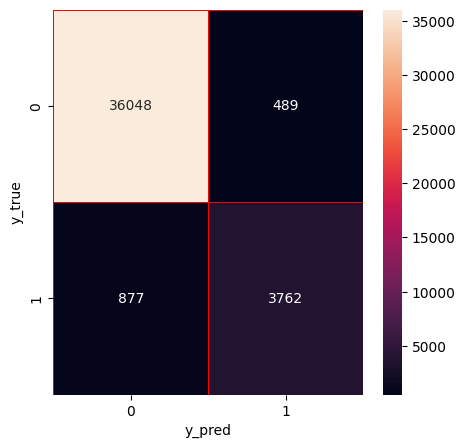

Best hyperparameters: {'learning_rate': 0.4252987714754148, 'num_leaves': 44, 'max_depth': 9, 'subsample': 0.6087806034599919, 'colsample_bytree': 0.820136461344158, 'class_weight': None}
Accuracy: 0.9668253351466873
False negative ratio: 0.18904936408708772
False positive ratio: 0.01338369324246654


In [55]:
import lightgbm as lgb
import optuna
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


# Define the objective function to minimize (in this case, validation loss)
def objective(trial):
    params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1),
        'num_leaves': trial.suggest_int('num_leaves', 2, 50),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced', {0:1, 1:5}])
    }
    model = lgb.LGBMClassifier(**params)
    
    # Use k-fold cross-validation instead of a single validation set
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    for train_index, valid_index in kf.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[valid_index]
        y_train, y_test = y.iloc[train_index], y.iloc[valid_index]
        
        model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], early_stopping_rounds=10, verbose=False)
        y_pred = model.predict(x_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        accuracies.append(accuracy)
        
    return 1 - sum(accuracies)/len(accuracies)

# Set up the Optuna study
study = optuna.create_study(direction='minimize')

# Run the study for a set number of trials
study.optimize(objective, n_trials=50)

# Get the best hyperparameters found
best_params = study.best_params

# Create the LightGBM model with the best parameters found
best_model = lgb.LGBMClassifier(**best_params)

# Fit the best model to the data
best_model.fit(x, y)

# Make predictions and evaluate
y_pred = best_model.predict(x)
cm = confusion_matrix(y, y_pred)
print(cm)

#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Print the best hyperparameters found
print("Best hyperparameters:", best_params)

# Make predictions and evaluate
y_pred = best_model.predict(x)
cm = confusion_matrix(y, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Calculate false negative and false positive ratios
tn, fp, fn, tp = cm.ravel()
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)
print("False negative ratio:", fnr)
print("False positive ratio:", fpr)


In [56]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
# Calculate precision, recall, and F1 score
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.884968242766408
Recall: 0.8109506359129123
F1 Score: 0.8463442069741283
